# 2. Exploring registration parameters

In this notebook we'll look at some of the registration parameters.

All parameters are explained in detail in the [elastix manual](https://github.com/SuperElastix/elastix/releases/download/5.1.0/elastix-5.1.0-manual.pdf).

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itk
from skimage import io

## Load data

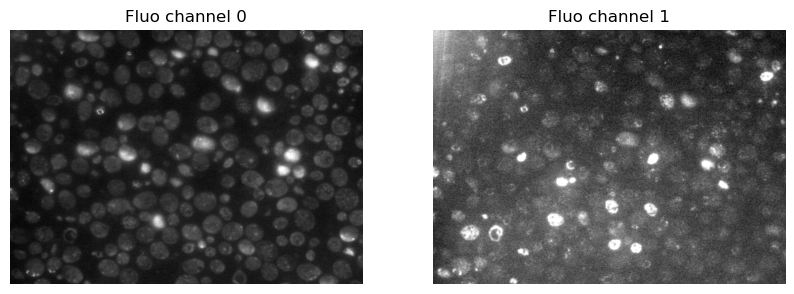

In [14]:
fixed = io.imread("../example_data/fluo_ch0.tif")
moving = io.imread("../example_data/fluo_ch1.tif")

fixed_image_itk = itk.GetImageFromArray(fixed)
moving_image_itk = itk.GetImageFromArray(moving)

# show the images next to each other
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].imshow(fixed_image_itk, cmap='gray')
ax[0].set_title('Fluo channel 0')
ax[0].axis('off')
ax[1].imshow(moving_image_itk, cmap='gray')
ax[1].set_title('Fluo channel 1')
ax[1].axis('off')

plt.show()

## Registering using different transforms

Different types of transformations can be used to register images, depending on the expected spatial transformations between the images. *itk-elastix* provides a set of default parameters for the following types of transformations:

- translation
- rigid
- affine
- bspline
- spline
- groupwise

### Transform: Translation

In [15]:
pmap_map_translation = itk.ParameterObject.New().GetDefaultParameterMap('translation')

registration_parameter_object = itk.ParameterObject.New()
registration_parameter_object.AddParameterMap(pmap_map_translation)

transformed_moving_image_translation, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_itk,
    moving_image_itk,
    parameter_object=registration_parameter_object,
    log_to_console=False
    )

### Transform: Rigid

A rigid transformation accounts for translation and rotation between the fixed and moving images.

In [16]:
pmap_map_rigid = itk.ParameterObject.New().GetDefaultParameterMap('rigid')

registration_parameter_object = itk.ParameterObject.New()
registration_parameter_object.AddParameterMap(pmap_map_rigid)

transformed_moving_image_rigid, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_itk,
    moving_image_itk,
    parameter_object=registration_parameter_object,
    log_to_console=False
    )

### Comparing the registration results

Which transform suits the data better?

In [9]:
import napari

def add_itk_image_to_viewer(viewer, image_itk, layer_name, colormap):
    viewer.add_image(
        image_itk,
        translate=fixed_image_itk.GetOrigin(),
        scale=fixed_image_itk.GetSpacing(),
        name=layer_name, colormap=colormap, blending='additive')

viewer = napari.Viewer()

add_itk_image_to_viewer(viewer, fixed_image_itk, 'fixed', 'Grey') 
add_itk_image_to_viewer(viewer, moving_image_itk, 'moving', 'Red') 
add_itk_image_to_viewer(viewer, transformed_moving_image_translation, 'translation', 'Red') 
add_itk_image_to_viewer(viewer, transformed_moving_image_rigid, 'rigid', 'Red') 

## Multiple resolutions

The registration can be performed at multiple resolutions. This can be useful to speed up the registration process, and to avoid local minima in the optimization process.

In [17]:
pmap = itk.ParameterObject.New().GetDefaultParameterMap('rigid')

# print the default parameter map
pd.DataFrame(
    {'Parameters': pmap.keys(),
    'Values': pmap.values()}
    )

,Parameters,Values
0,AutomaticParameterEstimation,"(true,)"
1,AutomaticScalesEstimation,"(true,)"
2,CheckNumberOfSamples,"(true,)"
3,DefaultPixelValue,"(0,)"
4,FinalBSplineInterpolationOrder,"(3,)"
5,FixedImagePyramid,"(FixedSmoothingImagePyramid,)"
6,ImageSampler,"(RandomCoordinate,)"
7,Interpolator,"(LinearInterpolator,)"
8,MaximumNumberOfIterations,"(256,)"
9,MaximumNumberOfSamplingAttempts,"(8,)"


In [18]:
# we can change the number of resolutions used for registration

pmap["NumberOfResolutions"] = ("1",)

# print the default parameter map
pd.DataFrame(
    {'Parameters': pmap.keys(),
    'Values': pmap.values()}
    )

,Parameters,Values
0,AutomaticParameterEstimation,"(true,)"
1,AutomaticScalesEstimation,"(true,)"
2,CheckNumberOfSamples,"(true,)"
3,DefaultPixelValue,"(0,)"
4,FinalBSplineInterpolationOrder,"(3,)"
5,FixedImagePyramid,"(FixedSmoothingImagePyramid,)"
6,ImageSampler,"(RandomCoordinate,)"
7,Interpolator,"(LinearInterpolator,)"
8,MaximumNumberOfIterations,"(256,)"
9,MaximumNumberOfSamplingAttempts,"(8,)"


In [21]:
# Runnning the registration

registration_parameter_object = itk.ParameterObject.New()
registration_parameter_object.AddParameterMap(pmap)

transformed_moving_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image_itk,
    moving_image_itk,
    parameter_object=registration_parameter_object,
    log_to_console=False
    )

In [22]:
import napari

def add_itk_image_to_viewer(viewer, image_itk, layer_name, colormap):
    viewer.add_image(
        image_itk,
        translate=fixed_image_itk.GetOrigin(),
        scale=fixed_image_itk.GetSpacing(),
        name=layer_name, colormap=colormap, blending='additive')

viewer = napari.Viewer()

add_itk_image_to_viewer(viewer, fixed_image_itk, 'fixed', 'Grey') 
add_itk_image_to_viewer(viewer, moving_image_itk, 'moving', 'Red') 
add_itk_image_to_viewer(viewer, transformed_moving_image, 'transformed', 'Red') 

#### Visualization

In this case the registration worked well with only one resolution, but in general it is a good idea to use multiple resolutions.

In [ ]:
import napari

def add_itk_image_to_viewer(viewer, image_itk, layer_name, colormap):
    viewer.add_image(
        image_itk,
        translate=fixed_image_itk.GetOrigin(),
        scale=fixed_image_itk.GetSpacing(),
        name=layer_name, colormap=colormap, blending='additive')

viewer = napari.Viewer()

add_itk_image_to_viewer(viewer, fixed_image_itk, 'fixed', 'Grey') 
add_itk_image_to_viewer(viewer, moving_image_itk, 'moving', 'Red') 
add_itk_image_to_viewer(viewer, transformed_moving_image_translation, 'translation', 'Red') 
add_itk_image_to_viewer(viewer, transformed_moving_image_rigid, 'rigid', 'Red') 

## Image metrics

According to the elastix manual: "The AdvancedMattesMutualInformation usually works well, both for mono- and multi-modal images".

In my experience, sometimes the "AdvancedNormalizedCorrelation" metric works better for mono-modal images.

In [25]:
pmap = itk.ParameterObject.New().GetDefaultParameterMap('rigid')

pmap['Metric'] = ("AdvancedNormalizedCorrelation", )

# print the default parameter map
pd.DataFrame(
    {'Parameters': pmap.keys(),
    'Values': pmap.values()}
    )

,Parameters,Values
0,AutomaticParameterEstimation,"(true,)"
1,AutomaticScalesEstimation,"(true,)"
2,CheckNumberOfSamples,"(true,)"
3,DefaultPixelValue,"(0,)"
4,FinalBSplineInterpolationOrder,"(3,)"
5,FixedImagePyramid,"(FixedSmoothingImagePyramid,)"
6,ImageSampler,"(RandomCoordinate,)"
7,Interpolator,"(LinearInterpolator,)"
8,MaximumNumberOfIterations,"(256,)"
9,MaximumNumberOfSamplingAttempts,"(8,)"
